## Retail_Sales_Product_Items_Linear_Regression


#### Problem Statement 
A Super store chain has several superstores in various parts of US of different sizes and stocks different commodities. The cost of various items is same across the stores and we are provided with daily item sales of these stores for 3 months


##### Busness Objective
Derive the factors affecting the various prices of stocks across the superstores.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing Sales Training Data Set
df_train = pd.read_csv('./Data Set/train_sales.csv')
# Importing Sales Test Data Set
df_test = pd.read_csv('./Data Set/test_sales.csv')

print("The Shape of Train set :-\n" ,df_train.shape)
print("The Shape of Test set :-\n", df_test.shape)

The Shape of Train set :-
 (8523, 12)
The Shape of Test set :-
 (5681, 11)


In [4]:
print("\nTrain set Columns :\n",df_train.columns)
print("\nTest set Columns :\n",df_test.columns)


Train set Columns :
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Test set Columns :
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [5]:
print("\nTrain set Info :\n",df_train.info())
print("\nTest set Info :\n",df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB

Train set Info :
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null fl

In [6]:
# Both Test  and Train set have missing values
print("\nNo of nulls in Train set:- \n")
print(df_train.isnull().sum(axis=0))
print("\nNo of nulls in Test set:- \n")
print(df_test.isnull().sum(axis=0))


# Summing up the missing values column-wise for train set
print('Column wise percentage of null values for train set : \n',round(100*(df_train.isnull().sum()/len(df_train.index)),2))

# Summing up the missing values column-wise for test set
print('\nColumn wise percentage of null values for test set : \n',round(100*(df_test.isnull().sum()/len(df_test.index)),2))


No of nulls in Train set:- 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

No of nulls in Test set:- 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
Column wise percentage of null values for train set : 
 Item_Identifier               0.00
Item_Weight                  17.17
Item_Fa

In [7]:
# For all grocery stores the Outlet_Size is Small
# Imputing the missing values
df_train.loc[df_train['Outlet_Type'] == "Grocery Store", ['Outlet_Size']] = 'Small'

df_test.loc[df_test['Outlet_Type'] == "Grocery Store", ['Outlet_Size']] = 'Small'


df_train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [8]:

# Summing up the missing values column-wise for train set
print('Column wise percentage of null values for train set : \n',round(100*(df_train.isnull().sum()/len(df_train.index)),2))

# Summing up the missing values column-wise for test set
print('\nColumn wise percentage of null values for test set : \n',round(100*(df_test.isnull().sum()/len(df_test.index)),2))

Column wise percentage of null values for train set : 
 Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  21.76
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

Column wise percentage of null values for test set : 
 Item_Identifier               0.00
Item_Weight                  17.18
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  21.76
Outlet_Location_Type          0.00
Outlet_Type                   0.00
dtype: float64


In [9]:
# For all Oulet_Type=Supermaket1 and Outlet_Location_Type =Tier 2 the Outlet_Size is Small
# Imputing the missing values
df_train.loc[(df_train['Outlet_Type'] == "Supermarket Type1") & (df_train['Outlet_Location_Type'] == "Tier 2"), ['Outlet_Size']] = 'Small'

df_test.loc[(df_test['Outlet_Type'] == "Supermarket Type1") & (df_test['Outlet_Location_Type'] == "Tier 2"), ['Outlet_Size']] = 'Small'

# Summing up the missing values column-wise for train set
print('Column wise percentage of null values for train set : \n',round(100*(df_train.isnull().sum()/len(df_train.index)),2))

# Summing up the missing values column-wise for test set
print('\nColumn wise percentage of null values for test set : \n',round(100*(df_test.isnull().sum()/len(df_test.index)),2))



Column wise percentage of null values for train set : 
 Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                   0.00
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

Column wise percentage of null values for test set : 
 Item_Identifier               0.00
Item_Weight                  17.18
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                   0.00
Outlet_Location_Type          0.00
Outlet_Type                   0.00
dtype: float64


In [10]:
# As you can see all Outlet_Size values are imputed
# Now we need to impute Item_Weight
# It seems that two outlets OUT019 and OUT027 have weights for all items missing
# Now on analysis it turns out an Item having same identifier in all the stores has same Item_Weight
# So, we will go through all item identifiers of items in OUT019 and OUT027 and impute their weight from outher outlets

df_train['Item_Weight'] = df_train.groupby(['Item_Identifier'])['Item_Weight'].ffill()
df_train['Item_Weight'] = df_train.groupby(['Item_Identifier'])['Item_Weight'].bfill()

df_test['Item_Weight'] = df_test.groupby(['Item_Identifier'])['Item_Weight'].ffill()
df_test['Item_Weight'] = df_test.groupby(['Item_Identifier'])['Item_Weight'].bfill()

# Summing up the missing values column-wise for train set
print('Column wise percentage of null values for train set : \n',round(100*(df_train.isnull().sum()/len(df_train.index)),2))

# Summing up the missing values column-wise for test set
print('\nColumn wise percentage of null values for test set : \n',round(100*(df_test.isnull().sum()/len(df_test.index)),2))





Column wise percentage of null values for train set : 
 Item_Identifier              0.00
Item_Weight                  0.05
Item_Fat_Content             0.00
Item_Visibility              0.00
Item_Type                    0.00
Item_MRP                     0.00
Outlet_Identifier            0.00
Outlet_Establishment_Year    0.00
Outlet_Size                  0.00
Outlet_Location_Type         0.00
Outlet_Type                  0.00
Item_Outlet_Sales            0.00
dtype: float64

Column wise percentage of null values for test set : 
 Item_Identifier              0.00
Item_Weight                  0.35
Item_Fat_Content             0.00
Item_Visibility              0.00
Item_Type                    0.00
Item_MRP                     0.00
Outlet_Identifier            0.00
Outlet_Establishment_Year    0.00
Outlet_Size                  0.00
Outlet_Location_Type         0.00
Outlet_Type                  0.00
dtype: float64


In [11]:
# We will delete the missing values as they cant be imputed any further
df_train = df_train.loc[~np.isnan(df_train['Item_Weight'])]
df_test = df_test.loc[~np.isnan(df_test['Item_Weight'])]

# Summing up the missing values column-wise for train set
print('Column wise percentage of null values for train set : \n',round(100*(df_train.isnull().sum()/len(df_train.index)),2))

# Summing up the missing values column-wise for test set
print('\nColumn wise percentage of null values for test set : \n',round(100*(df_test.isnull().sum()/len(df_test.index)),2))




Column wise percentage of null values for train set : 
 Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

Column wise percentage of null values for test set : 
 Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64


In [12]:
# It looks like the Item Fat content column has certain inconsistencies. Low fat, LF and low fat are all same and
# Regular and reg are same. So removing inconsistencies

df_train.loc[df_train['Item_Fat_Content']=="low fat",['Item_Fat_Content']] = "Low Fat"
df_train.loc[df_train['Item_Fat_Content']=="LF",['Item_Fat_Content']] = "Low Fat"
df_train.loc[df_train['Item_Fat_Content']=="reg",['Item_Fat_Content']] = "Regular"

df_test.loc[df_test['Item_Fat_Content']=="low fat",['Item_Fat_Content']] = "Low Fat"
df_test.loc[df_test['Item_Fat_Content']=="LF",['Item_Fat_Content']] = "Low Fat"
df_test.loc[df_test['Item_Fat_Content']=="reg",['Item_Fat_Content']] = "Regular"

# Also, let's remove the Outlet_Establishment_Year and Item Identifier as they dont seem to make sense
# when it comes to sales
df_train.drop(columns=['Outlet_Establishment_Year'],inplace=True)
df_test.drop(columns=['Outlet_Establishment_Year'],inplace=True)

df_train.drop(columns=['Item_Identifier'],inplace=True)
df_test.drop(columns=['Item_Identifier'],inplace=True)



In [13]:
# We will now treat outliers
q1 = df_train.Item_MRP.quantile(0.25)
q3 = df_train.Item_MRP.quantile(0.75)
iqr1 = q3-q1
upper = q3+1.5*iqr1
lower=  q1-1.5*iqr1

# Only values containing in the range  will be used for analysis
# Removing outliers
df_train = df_train[(df_train['Item_MRP'] < upper) & (df_train['Item_MRP'] > lower)]



q1 = df_train.Item_Outlet_Sales.quantile(0.25)
q3 = df_train.Item_Outlet_Sales.quantile(0.75)
iqr1 = q3-q1
upper = q3+1.5*iqr1
lower=  q1-1.5*iqr1

# Only values containing in the range  will be used for analysis
# Removing outliers
df_train = df_train[(df_train['Item_Outlet_Sales'] < upper) & (df_train['Item_Outlet_Sales'] > lower)]



#### Visualisation

We need to visualise the relationship between various dependent variable and independent variables  using boxplot and pairplot

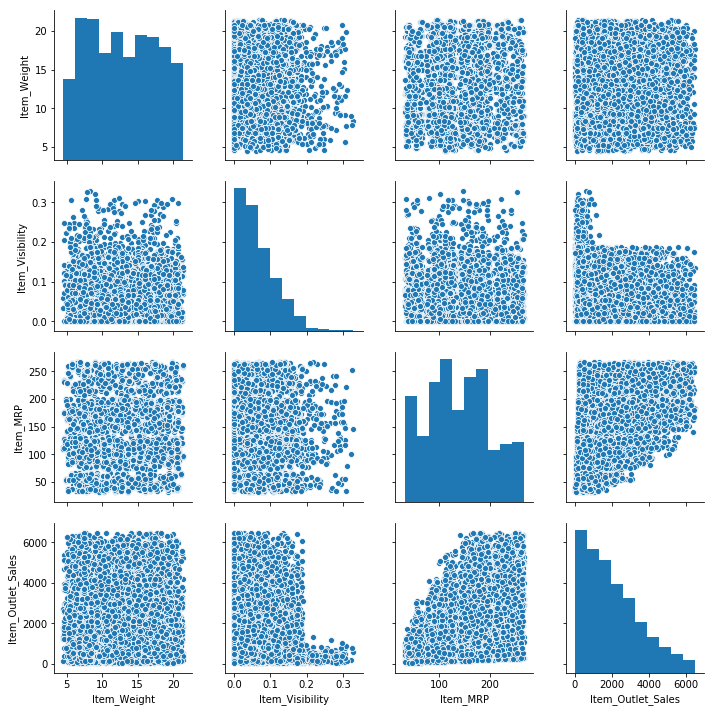

In [14]:
# Now, we will try to visualise the various training variables wrt Item_Outlet_Sales

# If there is some obvious multicollinearity going on, this is the first place to catch it
# Also, if any predictors directly have a strong association with the outcome variable it will be caught here
# We'll visualise our data using matplotlib and seaborn.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's make a pairplot of all the numeric variables

sns.pairplot(df_train)
plt.show()

<Figure size 2160x1440 with 0 Axes>

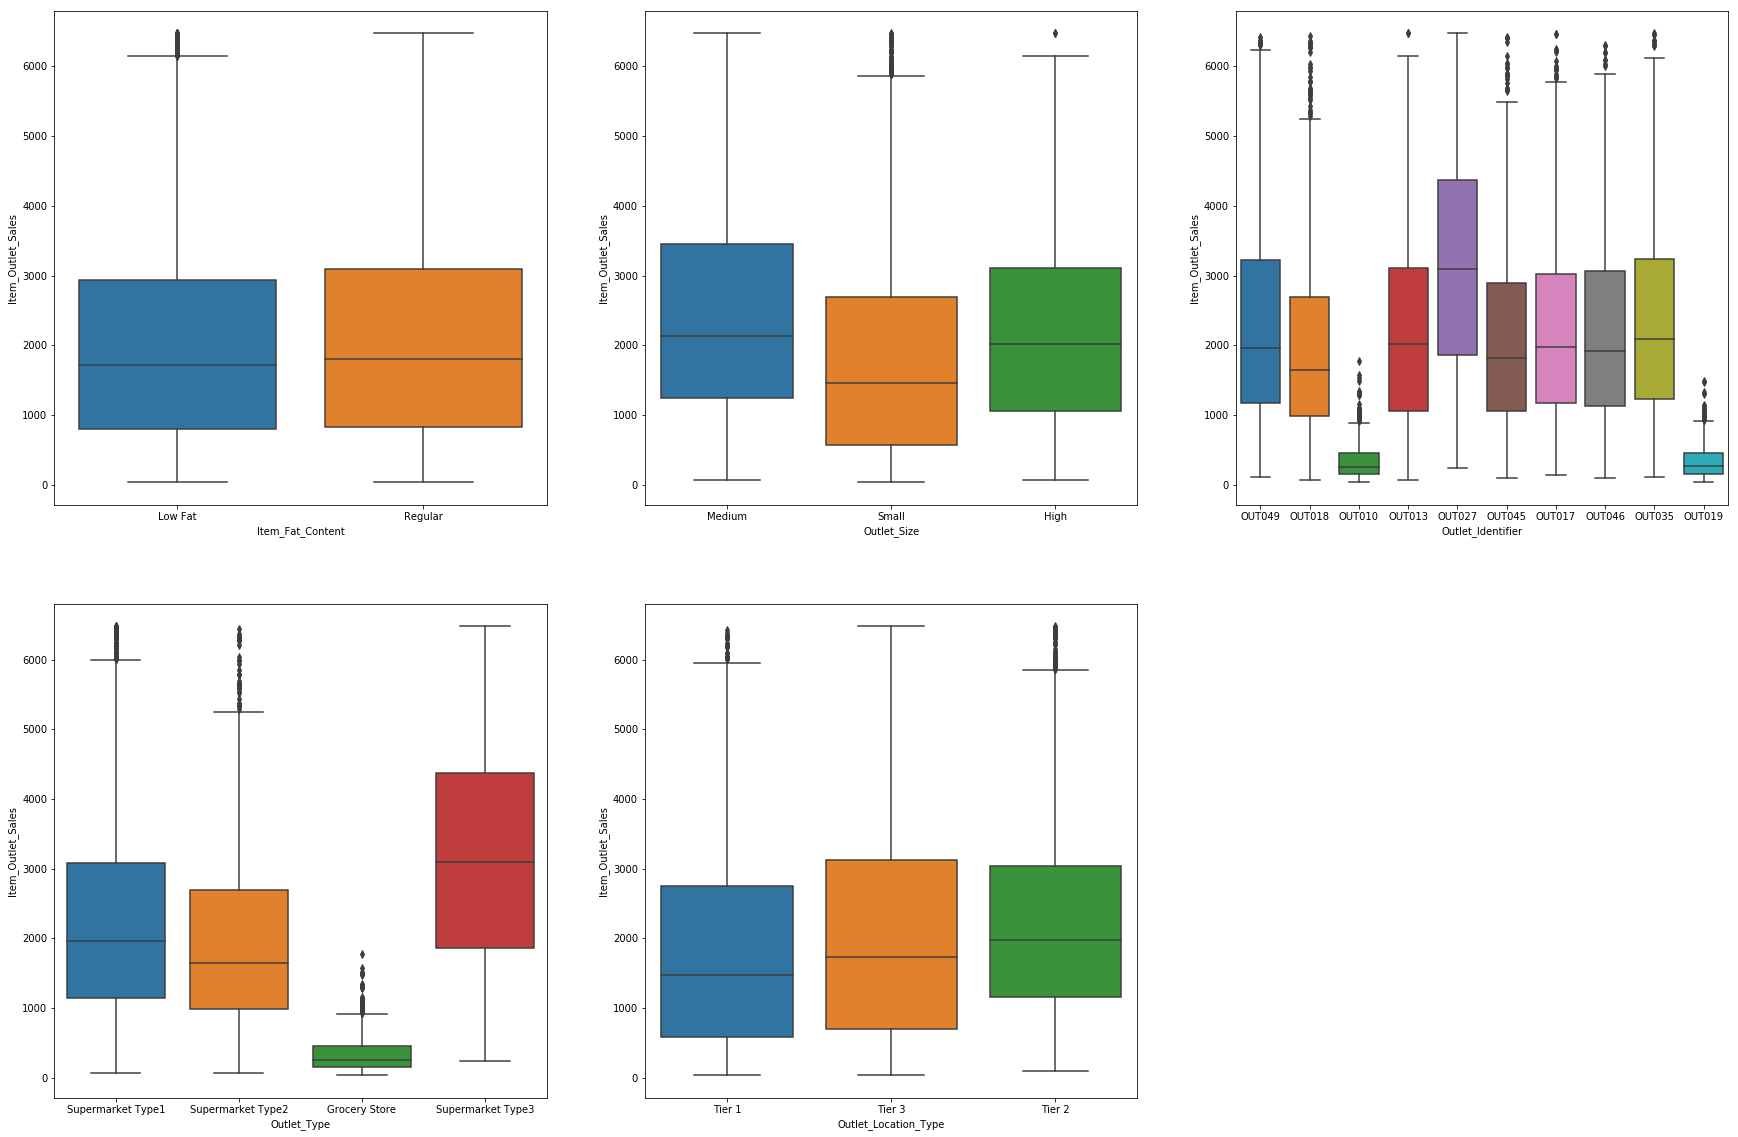

In [15]:
# Now, we will draw some box plots to analyse the variables

plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df_train)
plt.subplot(2,3,2)
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df_train)
plt.subplot(2,3,3)
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = df_train)
plt.subplot(2,3,4)
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df_train)
plt.subplot(2,3,5)
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = df_train)

plt.show()


<Figure size 5760x1440 with 0 Axes>

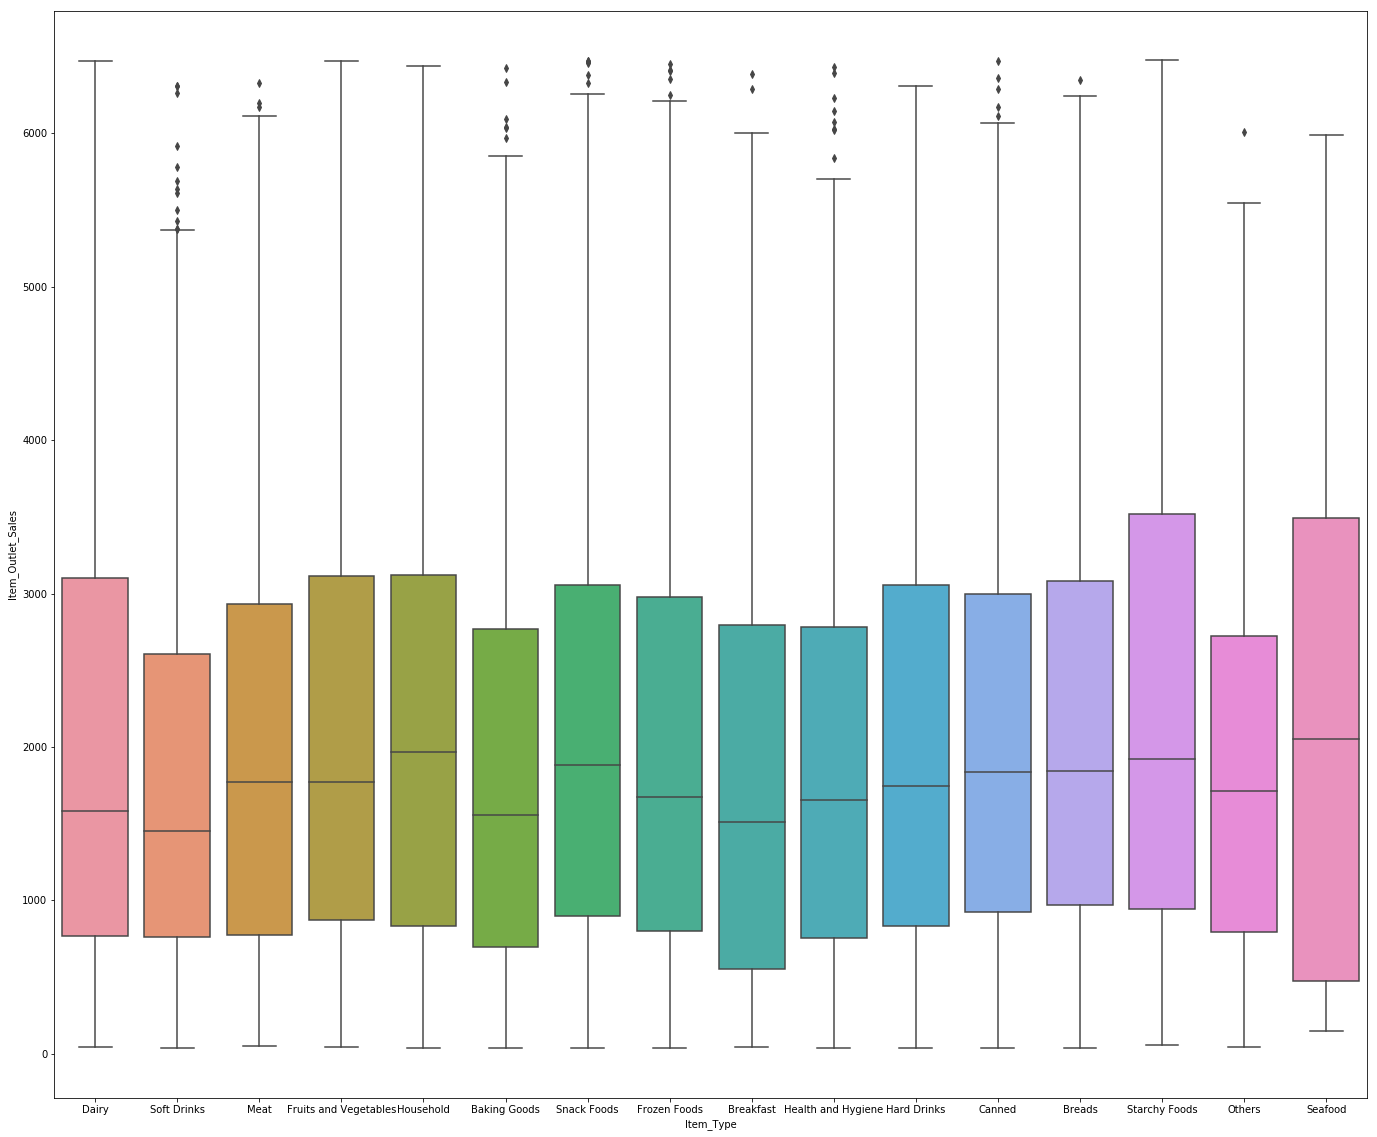

In [16]:
plt.figure(figsize=(80, 20))
plt.subplot(1,3,1)
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = df_train)

plt.show()

#### Deriving Dummy Variables

In [17]:
# As we can see that Item_Type, Fat_Content, Outlet_Type, Outlet_Location_Type, Outlet_Size and 
# Outlet_Identifier are all categorical variables, we will create dummmy variable for them

dummy_vars = pd.get_dummies(df_train[['Item_Fat_Content','Item_Type','Outlet_Identifier',\
                                      'Outlet_Size','Outlet_Location_Type','Outlet_Type' ]], drop_first = True)
model_df = pd.concat([df_train,dummy_vars],axis=1)

model_df.drop(columns=['Item_Fat_Content','Item_Type','Outlet_Identifier',\
                                      'Outlet_Size','Outlet_Location_Type','Outlet_Type'], inplace=True)


#### Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale. If we don't
have comparable scales, then some of the coefficients as obtained by fitting the regression model might be 
very large or very small as compared to the other coefficients. This might become very annoying at the time 
of model evaluation. So it is advised to use standardization or normalization so that the units of the 
coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

We will apply Standard scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

model_df[num_vars] = scaler.fit_transform(model_df[num_vars])

In [19]:
print( model_df.head())
print(model_df.describe())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0    -0.768526        -0.970438  1.797170           1.112906   
1    -1.495895        -0.908092 -1.476781          -1.072959   
2     0.996095        -0.956684  0.039640           0.025279   
3     1.361931        -1.280097  0.697175          -0.881077   
4    -0.848150        -1.280097 -1.385938          -0.706880   

   Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                         0                 0                    0   
1                         1                 0                    0   
2                         0                 0                    0   
3                         1                 0                    0   
4                         0                 0                    0   

   Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                 0                1                       0   
1                 0                0                       0   
2 

<Figure size 432x432 with 0 Axes>

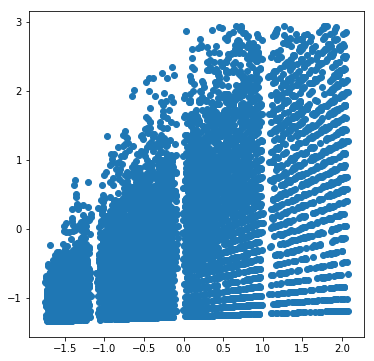

In [20]:
# As we can see, Itme_MRP seems to the correlated to sales (0.57) the most. Let's see a pairplot for 
# Item_MRP vs Sales.

plt.figure(figsize=[6,6])
plt.scatter(model_df.Item_MRP, model_df.Item_Outlet_Sales)
plt.show()

##### Dividing into X and Y sets for the model building

In [21]:
Y_train = model_df.pop('Item_Outlet_Sales')
X_train = model_df

##### Building our model
We will be using RFE for building our model

In [22]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Item_Weight', False, 13),
 ('Item_Visibility', False, 11),
 ('Item_MRP', True, 1),
 ('Item_Fat_Content_Regular', False, 3),
 ('Item_Type_Breads', False, 14),
 ('Item_Type_Breakfast', True, 1),
 ('Item_Type_Canned', False, 5),
 ('Item_Type_Dairy', True, 1),
 ('Item_Type_Frozen Foods', False, 7),
 ('Item_Type_Fruits and Vegetables', False, 12),
 ('Item_Type_Hard Drinks', False, 16),
 ('Item_Type_Health and Hygiene', False, 9),
 ('Item_Type_Household', False, 6),
 ('Item_Type_Meat', False, 15),
 ('Item_Type_Others', False, 4),
 ('Item_Type_Seafood', True, 1),
 ('Item_Type_Snack Foods', False, 8),
 ('Item_Type_Soft Drinks', True, 1),
 ('Item_Type_Starchy Foods', False, 10),
 ('Outlet_Identifier_OUT013', True, 1),
 ('Outlet_Identifier_OUT017', True, 1),
 ('Outlet_Identifier_OUT018', True, 1),
 ('Outlet_Identifier_OUT019', True, 1),
 ('Outlet_Identifier_OUT027', True, 1),
 ('Outlet_Identifier_OUT035', True, 1),
 ('Outlet_Identifier_OUT045', False, 2),
 ('Outlet_Identifier_OUT046', True, 1

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['Item_MRP', 'Item_Type_Breakfast', 'Item_Type_Dairy',
       'Item_Type_Seafood', 'Item_Type_Soft Drinks',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['Item_Weight', 'Item_Visibility', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Canned', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Snack Foods', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT045'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     746.2
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        01:52:42   Log-Likelihood:                -8434.4
No. Observations:                8333   AIC:                         1.690e+04
Df Residuals:                    8318   BIC:                         1.700e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         